Runtrack 3: 
Jour  - Regex & Graphique

By: Khaled METWALLY

Date: 23/09/2022

Job 0

Créer un programme qui demande à l'utilisateur de renseigner une chaîne de caractères
et qui écrit cette chaine de caractère dans un fichier “output.txt”.

In [1]:
txt=input("Enter une une chaîne de caractères:")

with open('output.txt', 'w') as f:
    f.writelines(txt)

print(txt)  #may the force be with you

5


Job 0.1

Créer un programme qui lit le contenu du fichier “output.txt” et qui l’affiche dans le
terminal.

In [2]:
with open('output.txt') as f:
    lines = f.readlines()

print(lines)

['5']


Créer un programme qui parcourt le contenu du fichier “domains.xml” et qui compte le
nombre d’extension de domaines qui s’y trouvent (.com, .net, etc …).

In [3]:
with open(r"domains.xml", 'r') as fp:
    for l_no, line in enumerate(fp):
        # search string
        if '.com' in line:
            print('string found in a file')
            print('Line Number:', l_no)
            print('Line:', line)
            # don't look for next lines
            break

string found in a file
Line Number: 35
Line:             <column name="domain">0815.ru0clickemail.com</column>



In [4]:
# Using os path splitext

import os

nbOfExt=0
ExtList=[]

with open(r"domains.xml", 'r') as fp:
    for l_no, line in enumerate(fp):
        # search string
        root_ext = os.path.splitext(line)[1]
        if (root_ext in line) and (len(root_ext)>3) and (len(root_ext)<5):
            nbOfExt=nbOfExt+1
            ExtList.append(root_ext)
            print('Line Number:', l_no)
            print('Line:', line)
            # don't look for next lines

In [5]:
ExtList

[]

In [6]:
# Using regular expressions

# import library
import pandas as pd
import re

nbOfExt=0
ExtList=[]

with open(r"domains.xml", 'r') as fp:
    for l_no, line in enumerate(fp):
        #pattern_ext=r"[.a-zA-Z0-9]"
        # pattern_ext=r"[.([a-zA-Z]{2,6}|[a-zA-Z0-9-]{2,30}\.[a-zA-Z]{2,3})]"
        
        match =re.search('[.]+[a-z]{1,3}', line)#[\.A-Za-z0-9]+
        # search given pattern in the line 
        #match = re.search(".xml", line)
        
        #groups=[match.group(i) for i in range(1271)]

        # if match is found
        if match:
            nbOfExt=nbOfExt+1
            ExtList.append(match.group())
            
            #print("The file ending with .xml is:", line)
print(nbOfExt)
ExtList
my_dict = {i:ExtList.count(i) for i in ExtList}
my_dict


print(pd.Series(ExtList).value_counts())

311
.com    173
.net     34
.de      17
.org     15
.inf     15
.fr       9
.co       4
.us       4
.eu       4
.biz      3
.me       3
.at       3
.in       3
.ru       2
.php      2
.it       2
.tk       1
.web      1
.naa      1
.ht       1
.law      1
.ze       1
.xl       1
.ws       1
.www      1
.nu       1
.w        1
.zik      1
.cc       1
.lv       1
.mez      1
.by       1
.blo      1
.la       1
dtype: int64


Créer un programme qui parcourt le contenu du fichier “data.txt” et qui compte le
nombre de mots (sans caractère spéciaux) qui s’y trouvent.

In [7]:
import re

nbOfWords=0

with open(r"data.txt", 'r') as fp:
    for l_no, line in enumerate(fp):
        cleaned_line=re.sub('[^A-Za-z0-9]+', ' ', line)       # remove special characters
        words=re.findall('\w+', cleaned_line)
        nbOfWords=nbOfWords+len(words)

print('Number of words without special characters is: ',nbOfWords)

Number of words without special characters is:  1176509


Job 02

Créer un programme qui demande à l’utilisateur de renseigner un nombre entier. Le
programme devra alors parcourir le contenu du fichier “data.txt” compter le nombre de
mots de la taille renseignée qui s’y trouvent.

In [8]:
import re
required_length=input("Enter integer number")

counter=0
word_list=[]
with open(r"data.txt", 'r') as fp:
    for l_no, line in enumerate(fp):
        #word_list = [word for word in line.split() if len(word) == int(required_length)]
        cleaned_line=re.sub('[^A-Za-z0-9]+', ' ', line)       # remove special characters
        [word_list.append(word) for word in cleaned_line.split() if len(word) == int(required_length)]
        counter += len(word_list)
        #cleaned_line=re.sub('[^A-Za-z0-9]+', '', line)       # remove special characters
        #words=re.findall('\w+', cleaned_line)
        #nbOfWords=nbOfWords+len(words)

print('Number of words that contains', required_length,'words is: ', len(word_list))

Number of words that contains 5 words is:  166592


Job 03

Écrire un programme qui parcourt le fichier “data.txt” et qui compte le nombre
d'occurrence de chaque lettre (Minuscules et Capitales comptent pour la même lettre).
A l’aide du module MatPlotLib, générer un histogramme représentant le pourcentage
d’apparition de chaque lettre.

e    767401
i    737028
t    554469
u    544936
a    528297
s    481735
n    414611
m    381248
o    356710
r    353705
d    220641
c    206494
l    181896
p    175750
q    145419
v     91115
b     79685
h     53718
g     52933
f     50103
x     20578
y      2880
z      1005
k       475
w       238
j        76
dtype: int64


<AxesSubplot:>

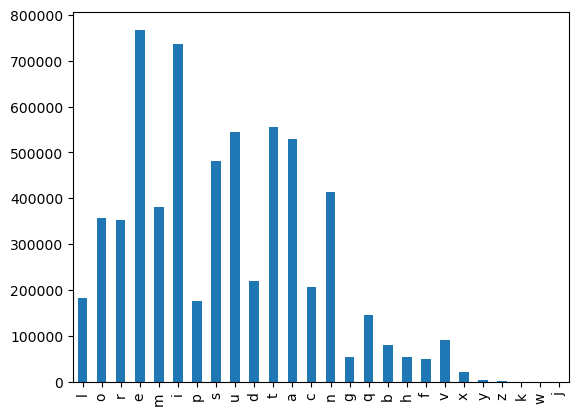

In [9]:
import matplotlib.pyplot as plt
import re

nbOfWords=0
letters=[]
lettersGroup=[]
with open(r"data.txt", 'r') as fp:
    for l_no, line in enumerate(fp):
        cleaned_line=re.sub(r'[^A-Za-z]+', '', line).lower()      # remove special characters and numbers
        for letter in cleaned_line :
            if letter.strip() !='':
                letters.append(letter)

        #letters.append(list(cleaned_line))
        #lineS =re.split(r'\[A-Za-z]{0}', cleaned_line,2)
        #match =re.search(r'\[A-Za-z]{0}', cleaned_line)
        #match=re.findall('\[A-Za-z]{1,1}', letters)
        #match =re.search(r'[a-z]', cleaned_line)#[\.A-Za-z0-9]+
        # search given pattern in the line 
        # if match is found
        #if match:
        #    nbOfExt=nbOfExt+1
        #    lettersGroup.append(match.group())

print(pd.Series(letters).value_counts())

pd.Series(letters).value_counts(sort=False).plot(kind="bar")

In [10]:
Sorted_letters=pd.Series(letters).value_counts().groupby(level=0).sum()
Sorted_letters

a    528297
b     79685
c    206494
d    220641
e    767401
f     50103
g     52933
h     53718
i    737028
j        76
k       475
l    181896
m    381248
n    414611
o    356710
p    175750
q    145419
r    353705
s    481735
t    554469
u    544936
v     91115
w       238
x     20578
y      2880
z      1005
dtype: int64

<AxesSubplot:>

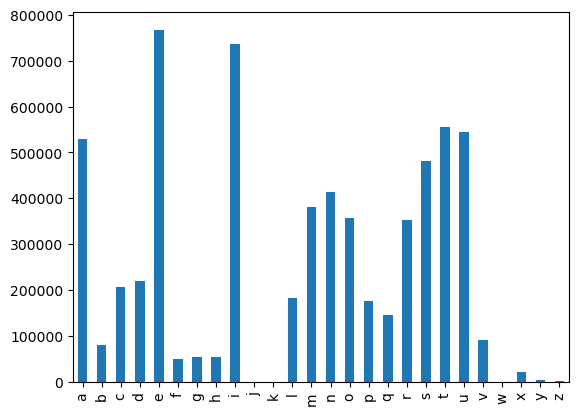

In [11]:
Sorted_letters.plot(kind="bar")

<AxesSubplot:>

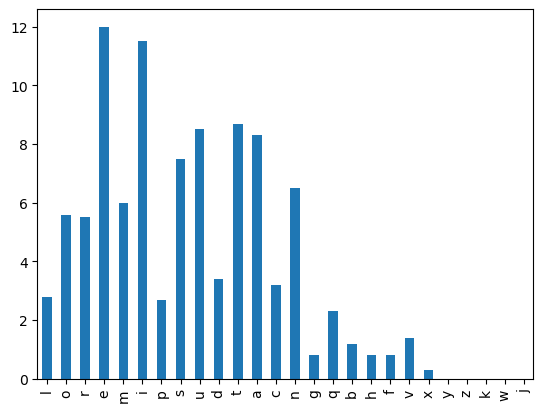

In [12]:
pd.Series(letters).value_counts(sort=False, normalize=True).mul(100).round(1).plot(kind="bar")

Job 13

Écrire un programme qui parcourt le fichier “data.txt” et qui, pour chaque lettre, compte
le nombre d'occurrence de la lettre suivante. Générer, ensuite, un graphique de courbes
superposées, une courbe par lettre, montrant le pourcentage d’apparition de chaque
lettre la suivant.
Par exemple, pour le a: a(2%), b(5%), c(2.3%) …. pour le b: a(3%), b(0%), c(1%), …

Job 21

Créer un générateur de mots en vous appuyant sur les statistiques précédemment
calculées (longueur des mots, première lettre des mots, enchaînement de lettres).

Job 34

En analysant à nouveau le fichier “data.txt”, établissez des statistiques synthétisant le
nombre de mots par phrase. Produisez un histogramme présentant ces statistiques,
puis, à l’aide de votre générateur de mot, créez un générateur de phrases à consonance
de “Lorem Ipsum”.